In [1]:
#Initializing
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics

#Loading Data - 2014
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

# Data Investigation

In [2]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [4]:
df.loc[df['overall'] == 1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
39,30.48,"Keflezighi, Meb",1,76.00,M,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82


In [5]:
#checking for null values
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [6]:
#Finding number of unique values within the column to see if we have the right amount of decodes
for i in df.columns:
    print(i)
    print(df[i].nunique())

10k
2766
name
31915
division
6979
25k
6570
gender
2
age
64
official
11030
bib
31984
genderdiv
17575
ctz
84
35k
9516
overall
31931
pace
727
state
68
30k
8090
5k
1491
half
5651
20k
5375
country
78
city
5934
40k
10546


### Type of data:

|Runner Info|Running Time|
|---|---|
|5k|name|
|10k|age|
|20k|gender|
|half|division|
|25k|bib|
|30k|genderdiv|
|35k|country|
|40k|city|
|official (complete time)|state|
|pace|ctz|
|overall (place finished)|


|Continuous Var| Categorical Var|
|---|---|
|5k|name|
|10k|gender|
|20k|country|
|half|city|
|25k|state|
|30k|ctz|
|35k|bib|
|40k|division|
|official (complete time)|genderdiv|
|pace|
|overall (place finished)|
|age|


# Data Cleaning

In [7]:
#checking to see if there are '-' values
df.loc[df['5k'].str.contains('-')]

#replacing '-' values
df = df.replace('-', 0)

In [8]:
#changing to correct datatype
df = df.astype({'5k': 'float64',
    '10k': 'float64',
    '20k': 'float64',
    'half': 'float64',
    '25k': 'float64',
    '30k': 'float64',
    '35k': 'float64',
    '40k': 'float64'})

In [9]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null float64
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null float64
5k           31984 non-null float64
half         31984 non-null float64
20k          31984 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null float64
dtypes: float64(10), int64(4), object(7)
memory usage: 5.1+ MB


# Data Visualizations

In [10]:
#function to plot counts of values
def plot_val_counts(dataframe, var):
    plt.figure(figsize=(10,5))
    
    plt.title("Count of {}".format(var))
    ax = sns.countplot(dataframe[var], 
    order = dataframe[var].value_counts().index)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, 
                color='black', ha='center', va='bottom')

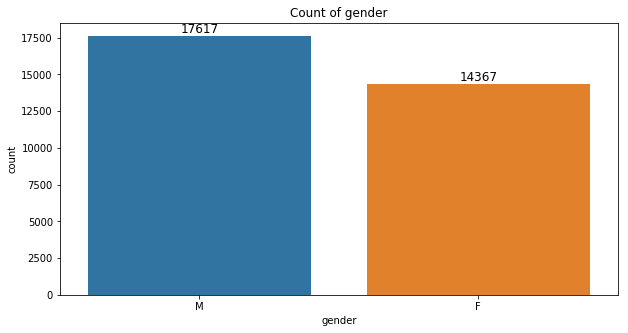

In [11]:
plot_val_counts(df, 'gender')

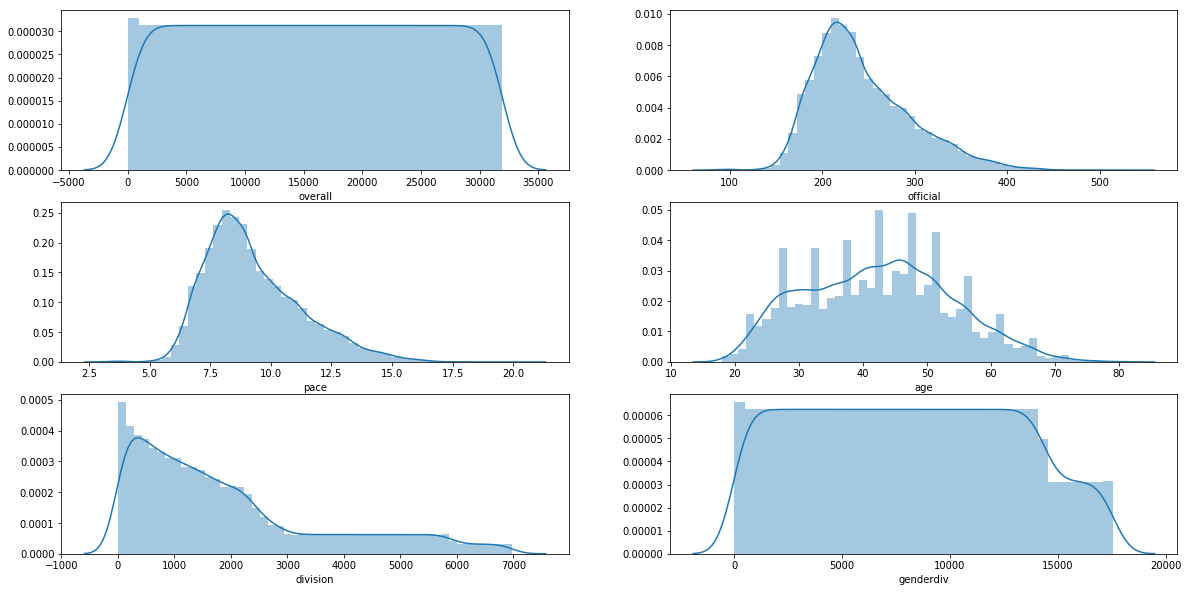

In [12]:
# Distribution plots
plt.figure(figsize=(20,10))
plt.subplot(3, 2, 1)
sns.distplot(df['overall'])
plt.subplot(3, 2, 2)
sns.distplot(df['official'])
plt.subplot(3, 2, 3)
sns.distplot(df['pace'])
plt.subplot(3, 2, 4)
sns.distplot(df['age'])
plt.subplot(3, 2, 5)
sns.distplot(df['division'])
plt.subplot(3, 2, 6)
sns.distplot(df['genderdiv'])

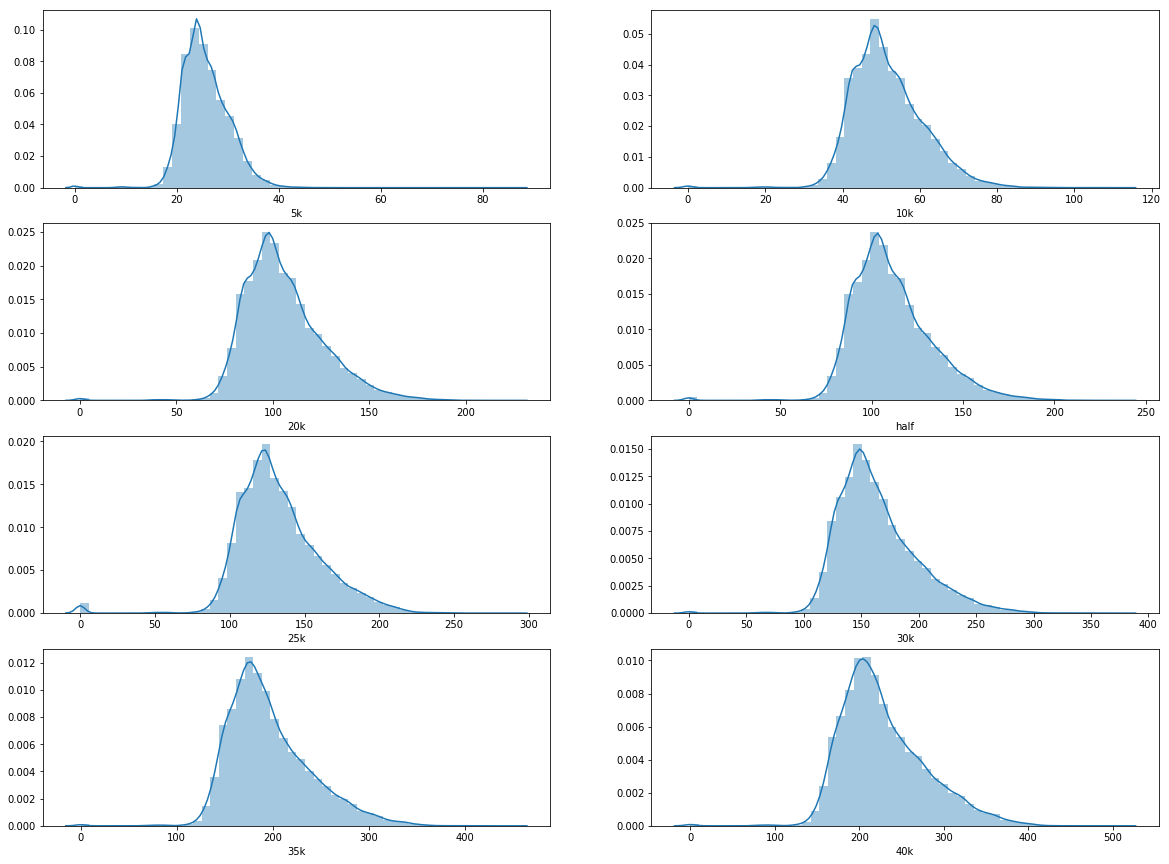

In [13]:
# Distribution plots
plt.figure(figsize=(20,15))
plt.subplot(4, 2, 1)
sns.distplot(df['5k'])
plt.subplot(4, 2, 2)
sns.distplot(df['10k'])
plt.subplot(4, 2, 3)
sns.distplot(df['20k'])
plt.subplot(4, 2, 4)
sns.distplot(df['half'])
plt.subplot(4, 2, 5)
sns.distplot(df['25k'])
plt.subplot(4, 2, 6)
sns.distplot(df['30k'])
plt.subplot(4, 2, 7)
sns.distplot(df['35k'])
plt.subplot(4, 2, 8)
sns.distplot(df['40k'])

The time based variables have similar distribution curves.

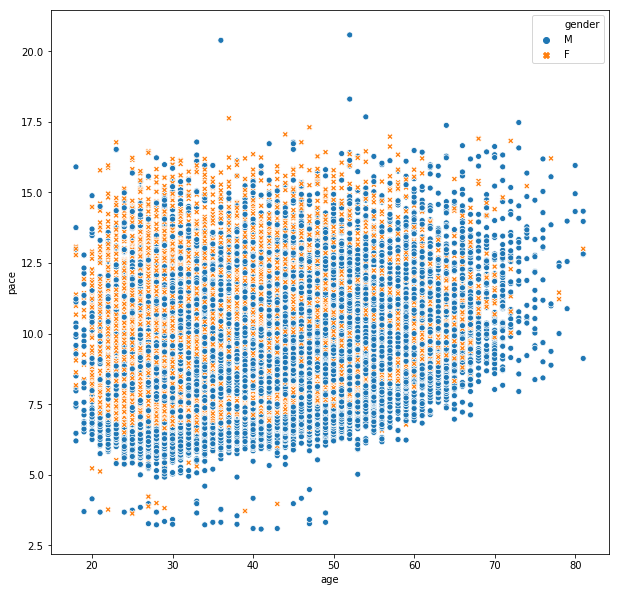

In [14]:
# Graphing scatterplot of gender distributed by age and pace
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x="age", y="pace", data=df, hue='gender', style='gender', ax = ax)

Clusters between male and female overlap each other with these variables

In [15]:
#creating arrays to be used in 3D scatter plot

df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']

a = df_male['age'].values
b = df_male['division'].values
c = df_male['pace'].values

d = df_female['age'].values
e = df_female['division'].values
f = df_female['pace'].values

trim_male = (a,b,c)
trim_female = (d,e,f)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  from ipykernel import kernelapp as app


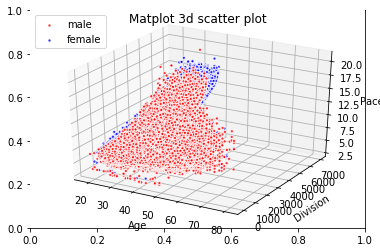

In [16]:
#creating 3d scatter plot of gender distributed by age, division and pace
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#%matplotlib notebook

data = (trim_male, trim_female)
colors = ("red", "blue")
groups = ("male", "female") 

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
ax = fig.gca(projection='3d')

for data, color, group in zip(data, colors, groups):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.8, edgecolors='w', c=color, s=10, label=group)

plt.title('Matplot 3d scatter plot')
#plt.xlabel('age')
#plt.ylabel('division')
ax.set_xlabel('Age')
ax.set_ylabel('Division')
ax.set_zlabel('Pace')

plt.legend(loc=2)
plt.show()

Not many definable clusters since the variables are highly correlated. 

In [17]:
#creating new feature dividing up overall placement into groups
conditions = [
    (df['overall'] > 0) & (df['overall'] <= 1000),
    (df['overall'] > 1000) & (df['overall'] <= 5000),
    (df['overall'] > 5000) & (df['overall'] <= 10000),
    (df['overall'] > 10000) & (df['overall'] <= 15000),
    (df['overall'] > 15000) & (df['overall'] <= 20000),
    (df['overall'] > 20000) & (df['overall'] <= 25000),
    (df['overall'] > 25000) & (df['overall'] <= 30000),
    (df['overall'] > 30000)
]

choices = [
    'Top 1000',
    '1,001-5,000',
    '5,001-10,000',
    '10,001-15,000',
    '15,001-20,000',
    '20,001-25,000',
    '25,001-30,000',
    'over 30,000']

df['rank'] = np.select(conditions, choices, default='other')

#varient
conditions_2 = [
    (df['overall'] > 0) & (df['overall'] <= 10000),
    (df['overall'] > 10000) & (df['overall'] <= 20000),
    (df['overall'] > 20000) & (df['overall'] <= 30000),
    (df['overall'] > 30000)
]

choices_2 = [
    'Top 10,000',
    '10,001-20,000',
    '20,001-30,000',
    'over 30,000']

df['rank_2'] = np.select(conditions_2, choices_2, default='other')

In [18]:
#check
df[['overall', 'rank']].head(20)

,overall,rank
0,8,Top 1000
1,21,Top 1000
2,1,Top 1000
3,27,Top 1000
4,2,Top 1000
5,28,Top 1000
6,4,Top 1000
7,5,Top 1000
8,3,Top 1000
9,20,Top 1000


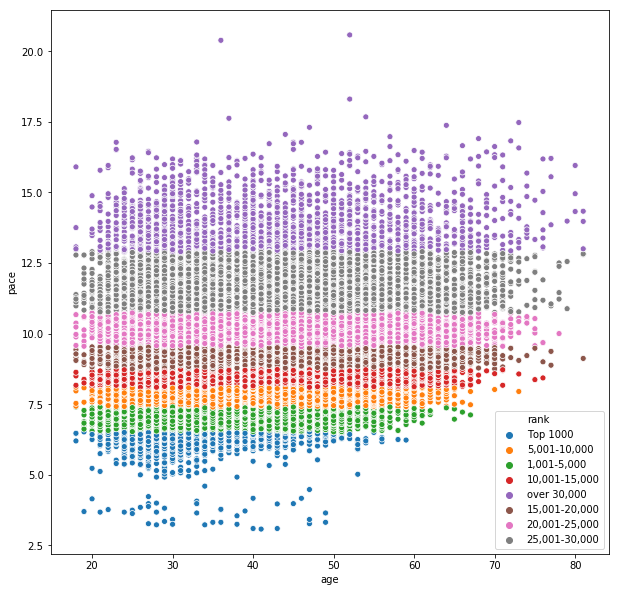

In [19]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x="age", y="pace", data=df, hue='rank',  ax = ax)

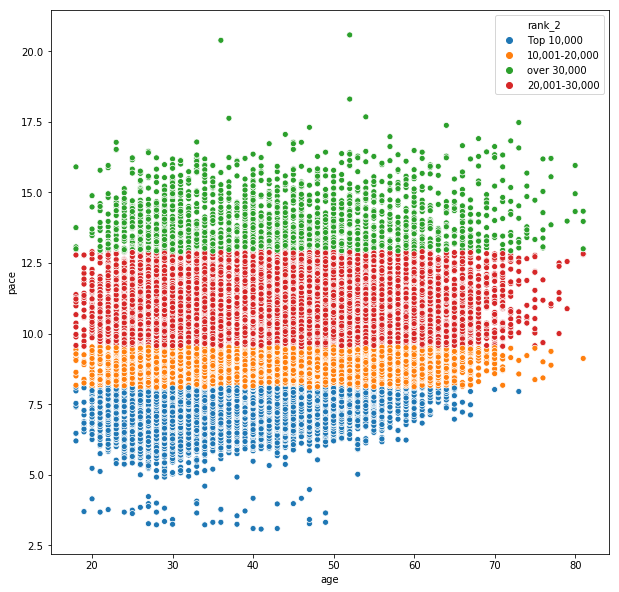

In [20]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x="age", y="pace", data=df, hue='rank_2',  ax = ax)

These clusters are somewhat defined but still correlated to 'pace'.

In [21]:
#Creating variables
X = df[['age','pace']]
y = df['rank_2']

In [22]:
#Split dataset into training set and test set
from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=21)

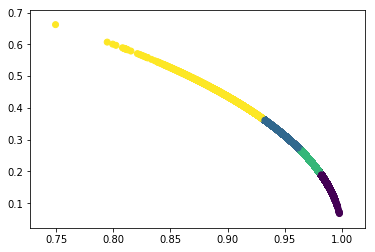

Comparing k-means clusters against the data:
rank_2  10,001-20,000  20,001-30,000  Top 10,000  over 30,000
row_0                                                        
0                5466           2665        6108           68
1                1308           2497         898          719
2                3089           3668        3034          551
3                 137           1170          13          593


In [23]:
#k-means
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Normalize the data.
X_norm = normalize(X)

# Calculate predicted values.
y_pred_kmeans = KMeans(n_clusters=4, random_state=21).fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_norm[:,0], X_norm[:,1], c=y_pred_kmeans)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_kmeans, y))

In [24]:
from sklearn import metrics

metrics.adjusted_rand_score(y_pred_kmeans, y)  

0.06795034128001788

Best predictor at of all cluster method, however still very bad at predicting

Estimated Bandwidth: 5.481116264738674
Number of estimated clusters: 4


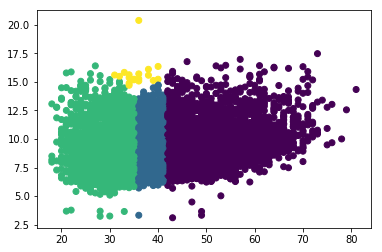

Comparing the assigned categories to the ones in the data:
col_0             0    1    2   3
rank_2                           
10,001-20,000  1270  319  456   0
20,001-30,000  1143  296  533   0
Top 10,000      814  415  778   0
over 30,000     195   47  112  18


In [31]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
print("Estimated Bandwidth: {}".format(bandwidth))

# Declare and fit the model.
ms = MeanShift(bandwidth=4, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train['age'], X_train['pace'], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [26]:
from sklearn import metrics

metrics.adjusted_rand_score(labels, y_train)  

0.019677555241050696

Not very good at predicting the clusters

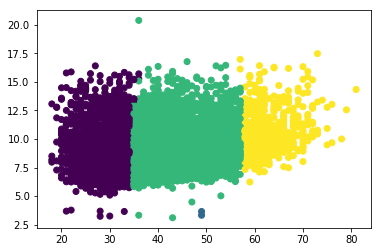

Comparing the assigned categories to the ones in the data:
rank_2  10,001-20,000  20,001-30,000  Top 10,000  over 30,000
row_0                                                        
0                 400            499         709          122
1                   0              0           2            0
2                1439           1157        1258          180
3                 206            316          38           70


In [27]:
#spectral clustering
from sklearn.cluster import SpectralClustering

n_clusters=4
 
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
y_pred_spec_clust = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train['age'], X_train['pace'], c=y_pred_spec_clust)
plt.show()


print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred_spec_clust, y_train))

In [29]:
from sklearn import metrics

metrics.adjusted_rand_score(y_pred_spec_clust, y_train)  

0.02139301956652586

Not good at predicting the clusters.

Given this marathon dataset, we can conclude that because of the relationships between each field is highly correlated it is difficult to find identifiable clusters. With that cluster models should not be used with this data. 